In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

Preparacion del archivo properties_colombia_test.csv
---

--------

In [2]:
data_test = pd.read_csv('properties_colombia_test.csv')

In [4]:
data_test.shape

(65850, 26)

In [3]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       65850 non-null  int64  
 1   id               65850 non-null  object 
 2   ad_type          65850 non-null  object 
 3   start_date       65850 non-null  object 
 4   end_date         65850 non-null  object 
 5   created_on       65850 non-null  object 
 6   lat              49433 non-null  float64
 7   lon              49433 non-null  float64
 8   l1               65850 non-null  object 
 9   l2               65850 non-null  object 
 10  l3               62193 non-null  object 
 11  l4               15074 non-null  object 
 12  l5               9052 non-null   object 
 13  l6               2364 non-null   object 
 14  rooms            9110 non-null   float64
 15  bedrooms         13403 non-null  float64
 16  bathrooms        52054 non-null  float64
 17  surface_tota

Verificamos que no hay instancias duplicadas

In [5]:
data_test[data_test.duplicated()]

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry


Quitamos la columna id

In [7]:
data_test.drop(columns ='id', inplace = True)

Renombramos la columna Unnamed: 0

In [8]:
data_test = data_test.rename(columns={'Unnamed: 0': 'index'})

## Tratamiento de valores faltantes

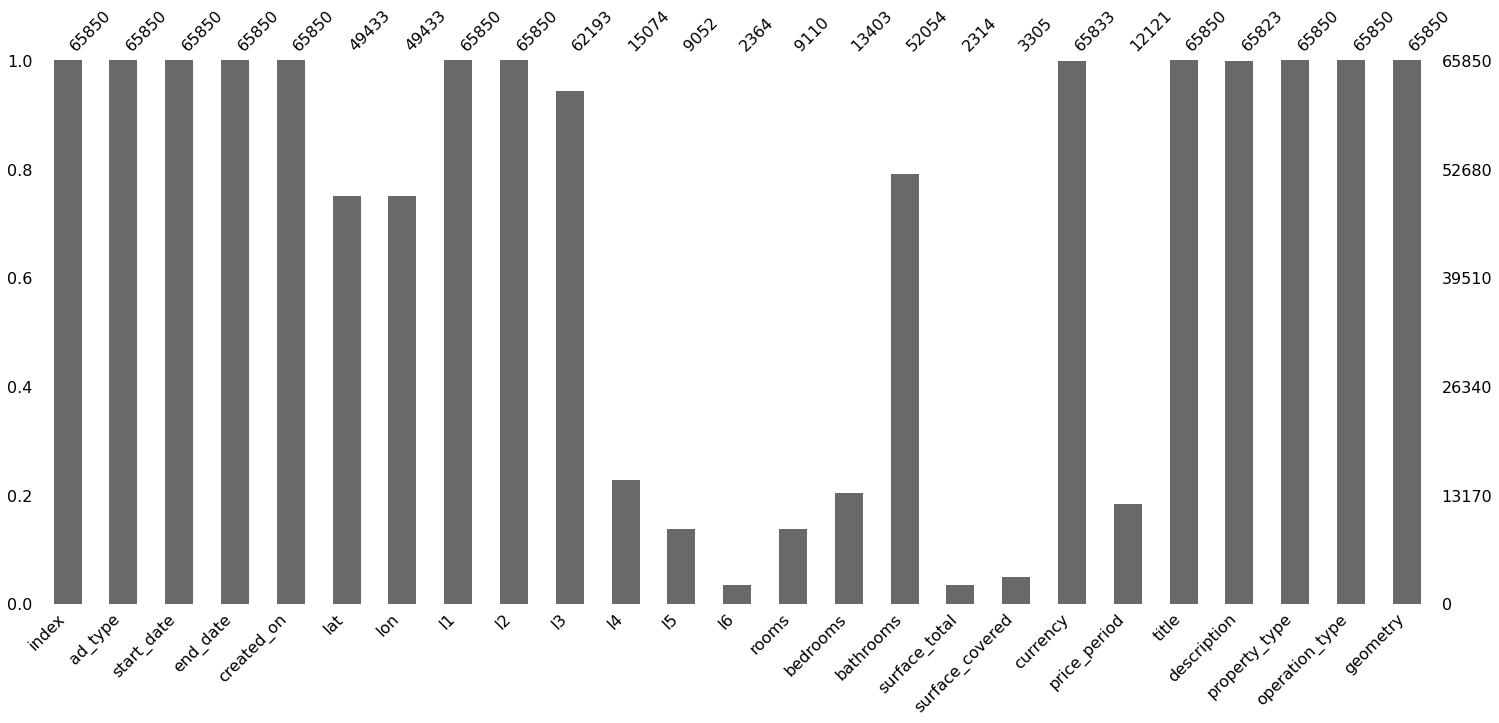

In [9]:
import missingno as msno

msno.bar(data_test)
plt.show()

Quitamos las l1, l3, l4, l5, l6 ya que en el train no las utilizamos

In [11]:
data_test = data_test.drop(['l1', 'l3', 'l4','l5', 'l6'], axis=1)

Mas columnas sin usar

In [12]:
data_test = data_test.drop(['ad_type', 'operation_type'], axis=1)

Preparo columna rooms

In [13]:
print('Porcentaje de valores faltantes de la variable rooms:', (data_test.rooms.isnull().sum()/len(data_test)) * 100)

Porcentaje de valores faltantes de la variable rooms: 86.16552771450266


Promedio de rooms segun la categoria property_type

In [14]:
data_test.property_type.value_counts()

Apartamento        33524
Casa               20084
Lote                5704
Otro                5372
Local comercial      434
Finca                377
Oficina              348
Parqueadero            7
Name: property_type, dtype: int64

In [15]:
rooms_apart = int(data_test[data_test['property_type'] == 'Apartamento'].rooms.mean())
rooms_casa = int(data_test[data_test['property_type'] == 'Casa'].rooms.mean())
rooms_otro = int(data_test[data_test['property_type'] == 'Otro'].rooms.mean())
rooms_Lote = int(data_test[data_test['property_type'] == 'Lote'].rooms.mean())
rooms_local = int(data_test[data_test['property_type'] == 'Local comercial'].rooms.mean())
rooms_finca = int(data_test[data_test['property_type'] == 'Finca'].rooms.mean())
rooms_oficina = int(data_test[data_test['property_type'] == 'Oficina'].rooms.mean())
rooms_parque = int(data_test[data_test['property_type'] == 'Parqueadero'].rooms.mean())
print(f'apartamento:{rooms_apart}, casa: {rooms_casa}, otro: {rooms_otro}, lote: {rooms_Lote}, local: {rooms_local}, finca:{rooms_finca}, oficina: {rooms_oficina}, parqueadero: {rooms_parque}')

apartamento:2, casa: 4, otro: 5, lote: 3, local: 3, finca:4, oficina: 3, parqueadero: 3


Completando valores nan con la media de su categoria

In [16]:
data_test['rooms'].fillna(data_test['property_type'].apply(lambda x:rooms_apart if x=='Apartamento' else np.nan), inplace=True)
data_test['rooms'].fillna(data_test['property_type'].apply(lambda x:rooms_casa if x=='Casa' else np.nan), inplace=True)
data_test['rooms'].fillna(data_test['property_type'].apply(lambda x:rooms_otro if x=='Otro' else np.nan), inplace=True)
data_test['rooms'].fillna(data_test['property_type'].apply(lambda x:rooms_Lote if x=='Lote' else np.nan), inplace=True)
data_test['rooms'].fillna(data_test['property_type'].apply(lambda x:rooms_local if x=='Local comercial' else np.nan), inplace=True)
data_test['rooms'].fillna(data_test['property_type'].apply(lambda x:rooms_finca if x=='Finca' else np.nan), inplace=True)
data_test['rooms'].fillna(data_test['property_type'].apply(lambda x:rooms_oficina if x=='Oficina' else np.nan), inplace=True)
data_test['rooms'].fillna(data_test['property_type'].apply(lambda x:rooms_parque if x=='Parqueadero' else np.nan), inplace=True)

Preparo columna bedrooms

In [18]:
print('Porcentaje de valores faltantes de la variable bedrooms:', (data_test.bedrooms.isnull().sum()/len(data_test)) * 100)

Porcentaje de valores faltantes de la variable bedrooms: 79.6461655277145


Media de cada categoria para bedrooms

In [19]:
bedr_apart = int(data_test[data_test['property_type'] == 'Apartamento'].bedrooms.mean())
bedr_casa = int(data_test[data_test['property_type'] == 'Casa'].bedrooms.mean())
bedr_otro = int(data_test[data_test['property_type'] == 'Otro'].bedrooms.mean())
bedr_Lote = int(data_test[data_test['property_type'] == 'Lote'].bedrooms.mean())
bedr_local = int(data_test[data_test['property_type'] == 'Local comercial'].bedrooms.mean())
bedr_finca = int(data_test[data_test['property_type'] == 'Finca'].bedrooms.mean())
bedr_oficina = int(data_test[data_test['property_type'] == 'Oficina'].bedrooms.mean())
bedr_parque = int(data_test[data_test['property_type'] == 'Parqueadero'].bedrooms.mean())
print(f'apartamento:{bedr_apart}, casa: {bedr_casa}, otro: {bedr_otro}, lote: {bedr_Lote}, local: {bedr_local}, finca:{bedr_finca}, oficina: {bedr_oficina}, parqueadero: {bedr_parque}')


apartamento:2, casa: 4, otro: 4, lote: 0, local: 1, finca:4, oficina: 1, parqueadero: 1


Reemplazo nan por la media segun categoria

In [20]:
data_test['bedrooms'].fillna(data_test['property_type'].apply(lambda x:bedr_apart if x=='Apartamento' else np.nan), inplace=True)
data_test['bedrooms'].fillna(data_test['property_type'].apply(lambda x:bedr_casa if x=='Casa' else np.nan), inplace=True)
data_test['bedrooms'].fillna(data_test['property_type'].apply(lambda x:bedr_otro if x=='Otro' else np.nan), inplace=True)
data_test['bedrooms'].fillna(data_test['property_type'].apply(lambda x:bedr_Lote if x=='Lote' else np.nan), inplace=True)
data_test['bedrooms'].fillna(data_test['property_type'].apply(lambda x:bedr_local if x=='Local comercial' else np.nan), inplace=True)
data_test['bedrooms'].fillna(data_test['property_type'].apply(lambda x:bedr_finca if x=='Finca' else np.nan), inplace=True)
data_test['bedrooms'].fillna(data_test['property_type'].apply(lambda x:bedr_oficina if x=='Oficina' else np.nan), inplace=True)
data_test['bedrooms'].fillna(data_test['property_type'].apply(lambda x:bedr_parque if x=='Parqueadero' else np.nan), inplace=True)

Preparo columna bathrooms

In [21]:
print('Porcentaje de valores faltantes de la variable bathrooms:', (data_test.bathrooms.isnull().sum()/len(data_test)) * 100)

Porcentaje de valores faltantes de la variable bathrooms: 20.950645406226272


In [22]:
bath_apart = int(data_test[data_test['property_type'] == 'Apartamento'].bathrooms.mean())
bath_casa = int(data_test[data_test['property_type'] == 'Casa'].bathrooms.mean())
bath_otro = int(data_test[data_test['property_type'] == 'Otro'].bathrooms.mean())
bath_Lote = int(data_test[data_test['property_type'] == 'Lote'].bathrooms.mean())
bath_local = int(data_test[data_test['property_type'] == 'Local comercial'].bathrooms.mean())
bath_finca = int(data_test[data_test['property_type'] == 'Finca'].bathrooms.mean())
bath_oficina = int(data_test[data_test['property_type'] == 'Oficina'].bathrooms.mean())
bath_parque = int(data_test[data_test['property_type'] == 'Parqueadero'].bathrooms.mean())
print(f'apartamento:{bath_apart}, casa: {bath_casa}, otro: {bath_otro}, lote: {bath_Lote}, local: {bath_local}, finca:{bath_finca}, oficina: {bath_oficina}, parqueadero : {bath_parque}')

apartamento:2, casa: 3, otro: 3, lote: 2, local: 1, finca:4, oficina: 1, parqueadero : 1


In [23]:
data_test['bathrooms'].fillna(data_test['property_type'].apply(lambda x:bath_apart if x=='Apartamento' else np.nan), inplace=True)
data_test['bathrooms'].fillna(data_test['property_type'].apply(lambda x:bath_casa if x=='Casa' else np.nan), inplace=True)
data_test['bathrooms'].fillna(data_test['property_type'].apply(lambda x:bath_otro if x=='Otro' else np.nan), inplace=True)
data_test['bathrooms'].fillna(data_test['property_type'].apply(lambda x:bath_Lote if x=='Lote' else np.nan), inplace=True)
data_test['bathrooms'].fillna(data_test['property_type'].apply(lambda x:bath_local if x=='Local comercial' else np.nan), inplace=True)
data_test['bathrooms'].fillna(data_test['property_type'].apply(lambda x:bath_finca if x=='Finca' else np.nan), inplace=True)
data_test['bathrooms'].fillna(data_test['property_type'].apply(lambda x:bath_oficina if x=='Oficina' else np.nan), inplace=True)
data_test['bathrooms'].fillna(data_test['property_type'].apply(lambda x:0 if x=='Parqueadero' else np.nan), inplace=True)

Preparo columnas de coordenadas

In [24]:
provincias = list(data_test['l2'].unique())
provincias

['Cundinamarca',
 'Antioquia',
 'Valle del Cauca',
 'Caldas',
 'Cauca',
 'Amazonas',
 'Norte de Santander',
 'Atlántico',
 'Santander',
 'Bolívar',
 'Risaralda',
 'Tolima',
 'Caquetá',
 'Quindío',
 'Magdalena',
 'Meta',
 'Nariño',
 'Huila',
 'Boyacá',
 'San Andrés Providencia y Santa Catalina',
 'Sucre',
 'Córdoba',
 'Cesar',
 'Casanare',
 'La Guajira',
 'Guainía',
 'Chocó',
 'Arauca',
 'Guaviare',
 'Vichada',
 'Putumayo']

Reemplazo valores faltantes por las coordenadas de su provincia

In [26]:
from geopy.geocoders import Nominatim
import time
import math
geo = Nominatim(user_agent='coords')

In [27]:
for i in provincias:
   loc = geo.geocode(i)
   datos = list(loc)
   coord = datos[1]
   data_test['lat'].fillna(data_test['l2'].apply(lambda x:coord[0] if x == i else np.nan), inplace=True)
   data_test['lon'].fillna(data_test['l2'].apply(lambda x:coord[1] if x == i else np.nan), inplace=True)

Quitamos columna geometry

In [28]:
data_test = data_test.drop('geometry', axis=1)

Quitamos columnas de superficies

In [29]:
data_test = data_test.drop(['surface_total', 'surface_covered'], axis=1)

Mas columnas innecesarias

In [30]:
data_test = data_test.drop(['currency', 'title', 'description', 'price_period'], axis=1)

Preparo columnas fechas

In [31]:
data_test = data_test.drop('created_on', axis=1)

In [32]:
data_test['end_date'].value_counts()

9999-12-31    3946
2020-08-27    1383
2020-11-13    1228
2020-11-30     967
2020-07-27     891
              ... 
2021-08-01       1
2021-07-04       1
2021-05-17       1
2021-06-06       1
2021-06-20       1
Name: end_date, Length: 438, dtype: int64

Reemplazo por año 2021

In [33]:
data_test['end_date'] = data_test['end_date'].replace('9999-12-31','2021-12-31')

Cambio el tipo de dato

In [34]:
data_test['start_date'] = data_test['start_date'].astype('datetime64[ns]')

In [35]:
data_test['end_date'] = data_test['end_date'].astype('datetime64[ns]')

Escalado/Normalizacion
---

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Categorias como strings

In [37]:
le.fit(data_test['property_type'])
print(le.classes_)

['Apartamento' 'Casa' 'Finca' 'Local comercial' 'Lote' 'Oficina' 'Otro'
 'Parqueadero']


Transformamos

In [38]:
data_test['property_type_le'] = le.transform(data_test['property_type'])

In [39]:
data_test.property_type_le.unique()

array([1, 0, 4, 6, 5, 2, 3, 7])

Quito columna string

In [40]:
data_test = data_test.drop('property_type', axis=1)

Preparo columna provincias

In [41]:
data_test = data_test.rename(columns={'l2':'provincias'})

Categorias

In [42]:
le.fit(data_test['provincias'])
print(le.classes_)

['Amazonas' 'Antioquia' 'Arauca' 'Atlántico' 'Bolívar' 'Boyacá' 'Caldas'
 'Caquetá' 'Casanare' 'Cauca' 'Cesar' 'Chocó' 'Cundinamarca' 'Córdoba'
 'Guainía' 'Guaviare' 'Huila' 'La Guajira' 'Magdalena' 'Meta' 'Nariño'
 'Norte de Santander' 'Putumayo' 'Quindío' 'Risaralda'
 'San Andrés Providencia y Santa Catalina' 'Santander' 'Sucre' 'Tolima'
 'Valle del Cauca' 'Vichada']


Tranformamos

In [43]:
data_test['provincias_le'] = le.transform(data_test['provincias'])

Quitamos la columna con strings

In [44]:
data_test = data_test.drop('provincias', axis=1)

Columnas de fechas a numericas

In [45]:
import datetime as dt
data_test['startdate_n']=data_test['start_date'].map(dt.datetime.toordinal)
data_test['enddate_n']=data_test['end_date'].map(dt.datetime.toordinal)

Ultimas modificaciones
---

In [46]:
data_test = data_test.drop(['index', 'start_date', 'end_date'], axis=1)

In [47]:
data_test = data_test.rename(columns={'property_type_le':'property_type', 'provincias_le':'provincias', 'startdate_n':'start_date', 'enddate_n':'end_date'})

In [48]:
data_prep = data_test.to_csv('data_test.csv', index=False)